# Assessment Review

The topics covered will be:

1. Normal Distributions
2. Statistical Tests
3. Bayesian Statistics
4. Linear Regression

In [21]:
# from src.call import call_on_students

In [22]:
import numpy as np 
import pandas as pd 
import plotly.express as px 
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt  

## Part 1: Normal Distributions

In this part, you will analyze hours of sleep for Freshman at a University. We know that the population distribution of hours of sleep for Freshman at the University is normally distributed with a mean of 6 and a standard deviation of 2.

### Task 1: Create a numeric variable `z_eight` that contains the z-score for a Freshman that sleeps 8 hours 

In [23]:
# call_on_students(1)

In [24]:
mu_fresh = 6
std_fresh = 2

# z_score = point - mu / std
z_eight = (8 - mu_fresh)/std_fresh
z_eight

1.0

### Task 2: Create a numeric variable `over_eight` containing the approximate proportion of Freshman who get more than 8 hours of sleep

In [25]:
1-stats.norm.cdf(z_eight)

0.15865525393145707

In [26]:
# call_on_students(1)

In [27]:
# best to import scipy stats!
from scipy import stats

In [28]:
# right side of distribution - can use .sf or 1-CDF
print('df:{}'.format(1 - stats.norm(loc=mu_fresh, scale=std_fresh).cdf(8)))


print('survival function: {}'.format(stats.norm(loc=mu_fresh, scale=std_fresh).sf(8)))

df:0.15865525393145707
survival function: 0.15865525393145707


In [29]:
# Can also get this answer more generally, based on the z-score
# Still the right side of distribution though
print(1 - stats.norm().cdf(z_eight))
print(stats.norm().sf(z_eight))

0.15865525393145707
0.15865525393145707


### Task 3: Calculate a 95% confidence interval for the amount of sleep for one Freshman who sleeps 7 times with a mean of 5 hours and a standard deviation of 0.5 hours

In [30]:
n = 7 
ddof = 7-1 
xbar = 5 
sd = .5 

stderror = sd / np.sqrt(n)

stats.t.interval(alpha = .95, df = ddof , loc = xbar, scale = stderror)

(4.53757712628571, 5.46242287371429)

In [31]:
# call_on_students(1)

In [32]:
# Let's capture these variables here
n = 7
mean = 5
std = .5

In [33]:
# More manual approach
# Need to calculate the standard error
sterr = std / (n ** 0.5)
# Use that to get to the margin of error
margin_error = stats.t.ppf(0.975, df=n-1) * sterr  # Using t because n=7
# Find our intervals
int_min = mean - margin_error
int_max = mean + margin_error
print(int_min, int_max)

4.53757712628571 5.46242287371429


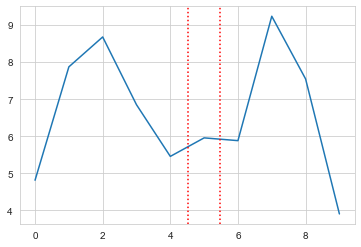

In [34]:
plt.plot(np.random.normal(loc = 6, scale =2, size = 10))
plt.axvline(int_min, color='r', linestyle=':')
plt.axvline(int_max, color='r', linestyle=':')

In [35]:
# Using Scipy Stats
# Using t because n=7
stats.t.interval(alpha=.95,  # Confidence level
                 loc=mean,  # Mean
                 # Still need to calculate that standard error by hand
                 scale=sterr,
                 df=n-1)

(4.53757712628571, 5.46242287371429)

### Task 4: Interpret the 95% Confidence Interval that you derived in the above question

In [36]:
# call_on_students(1)

- A 95% confidence interval means that there is a 95% chance for the interval to contain the true population mean. In this case, that means there is a 95% chance that the true mean of the distribution of hours of sleep likely for this Freshman is between 4.9 and 5.04 hours.


## Part 2: Hypothesis Testing

Let's make some hypotheses about cars!

### Task 5: Set Up

In [37]:
# call_on_students(1)

In [38]:
# Imports - need pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
# Import the auto-mpg csv from the data folder
df = pd.read_csv("auto-mpg.csv")

In [40]:
# Check the head of our data
df.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [41]:
# Check the info on our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [42]:
# Describe the data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


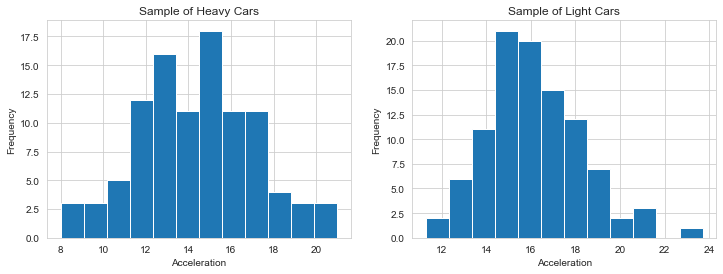

In [43]:
# Run this cell without changes to set up for the next set of questions

# Grabbing the median car weight
weight_median = df['weight'].median()

# Separating based on light cars and heavy cars
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Heavy Cars')
ax1.set_xlabel('Acceleration')
ax1.set_ylabel('Frequency')
ax1.hist(heavy_cars['acceleration'], bins=12)

ax2.set_title('Sample of Light Cars')
ax2.set_xlabel('Acceleration')
ax2.set_ylabel('Frequency')
ax2.hist(light_cars['acceleration'], bins=12)
plt.show()

### The Prompt: 

> Car manufacturers want to know if light cars accelerate faster than heavy cars.

### Task 6: Set up the null and alternative hypotheses for this test

In [44]:
# call_on_students(1)

**Null hypothesis:**
- light cars accelerate either slower than or equal to heavy cars

**Alternative hypothesis:**
- light cars accelerate faster than heavy cars

### Task 7: Describe your Type 1 and Type 2 errors in this context

In [45]:
# call_on_students(1)

**Type I Error:**
- you find evidence that light cars accelerate faster than heavy cars, but actually they're the same or slower

**Type II Error:**
- you don't find evidence that light cars accelerate faster than heavy cars, but actually they are faster


### Task 8: The Hypothesis Test!

### 8a: Describe the type of test:

In [46]:
# call_on_students(1)

- Two-sample independent t-test
- Right one-tailed test

### 8b: Run the test, using alpha = .05 and assuming that the samples have equal variance

In [47]:
# call_on_students(1)

In [48]:
# No reason not to use stats here!
print(stats.ttest_ind(light_cars['acceleration'], heavy_cars['acceleration']))

Ttest_indResult(statistic=5.00874014469676, pvalue=1.2096440668168987e-06)


### 8c: Analyze your results: can you reject the null hypothesis?

In [49]:
# call_on_students(1)

- P-value is 1.2 x 10^-6 - very small! Smaller than .05
- We can reject the null hypothesis

In [50]:
# In code: easiest to use p-value approach since we have it from the test!
alpha = .05
# Grab p-value from test:
p_value = stats.ttest_ind(light_cars['acceleration'], heavy_cars['acceleration'])[1]

print(f"Is T-test's P-Value ({p_value:.4f}) < alpha ({alpha})? {p_value < alpha}")

Is T-test's P-Value (0.0000) < alpha (0.05)? True


## Part 3: Bayesian Statistics

$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$$

### The Prompt: 
> In the second session of the 98th congress in 1984, a congressman voted 'No' on providing aid to El Salvador. 
> 
> Given that 60% of the congress were Democrats, 75% of whom voted 'No' for providing aid to El Salvador, and only 5% of Republicans voted 'No' to the proposal, what is the conditional probability that this individual is a Democrat?

### Task 9: Calculate the probability

In [51]:
.75 * .60 + .05 *.4 


.75 *.60 / .47

0.9574468085106382

In [52]:
# call_on_students(1)

**1. Which probability are we trying to find?**

   - P(Democrat | No)
    
**2. Based on that, what other pieces do we need?**

   - P(Democrat | No) = P(No | Democrat) * P(Democrat) / P(No)
   - SO:
   - P(No | Democrat) = .75
   - P(Democrat) = .6
   - P(No) = P(No | Dem) * P(Dem) + P(No | Rep) * P(Rep) = (.75 * .6) + (.06 * (1 - .6)) = .47
    
    
**3. Result?**

   - P(Democrat | No) = P(No | Democrat) * P(Democrat) / P(No)
   - P(Democrat | No) = .75 * .6 / .47 = .9574 &#8594; **96%!**
    

In [53]:
# In code
p_dem = .6
p_rep = 1-p_dem

p_no_given_dem = .75
p_no_given_rep = .05

In [54]:
p_no = p_no_given_dem * p_dem + p_no_given_rep * p_rep
p_no

0.47

In [55]:
p_dem_given_no = p_no_given_dem * p_dem / p_no
p_dem_given_no

0.9574468085106382

## Part 4: Simple Linear Regression

**BACK TO CARS**

### The Prompt:

> Car manufacturers have asked us to predict how many miles per gallon a car can run based on the other variables we have in the data we're given. 

Sounds like a regression problem! But first let's further explore the data.

### Task 10: Explore the Data Visually

In [56]:
import seaborn as sns

In [57]:
# call_on_students(1)

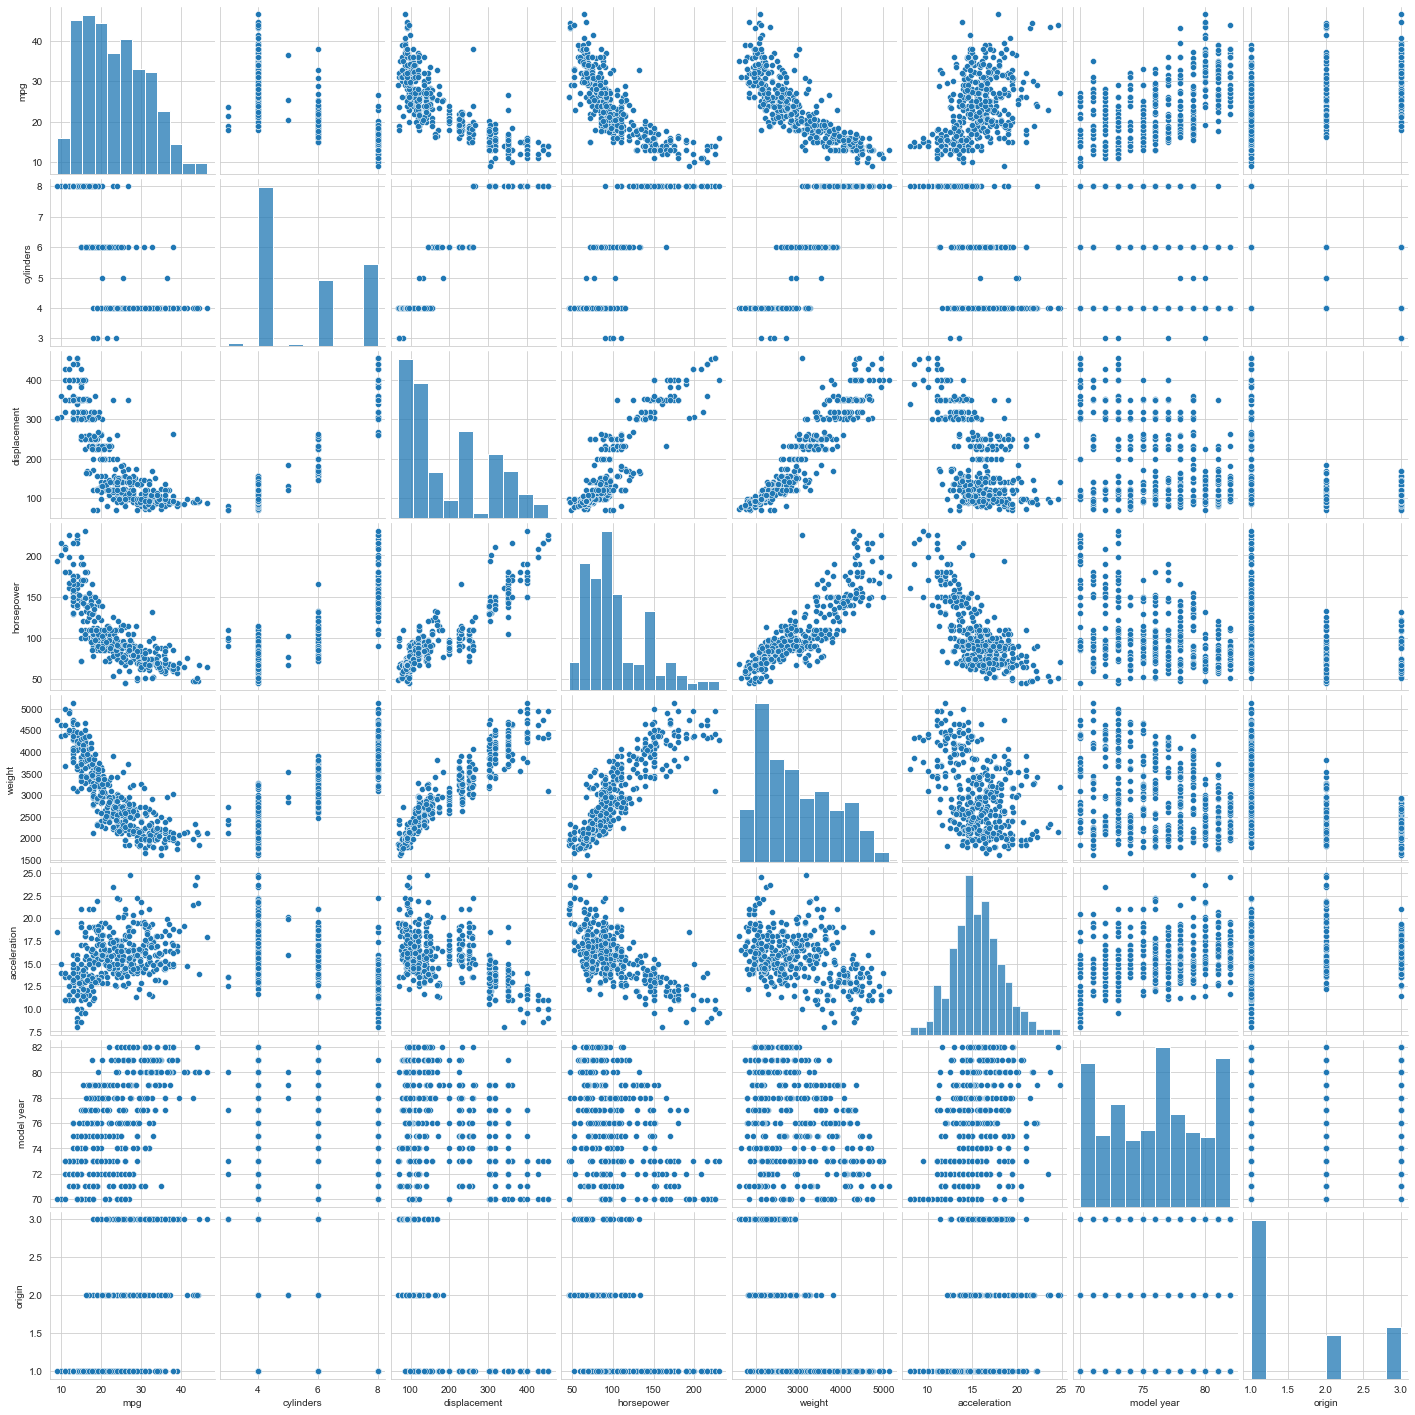

In [58]:
# Make a pairplot using seaborn to examine the relationships between variables
# Note - do this on the whole dataframe, not just independent variables
sns.pairplot(df)
plt.show()

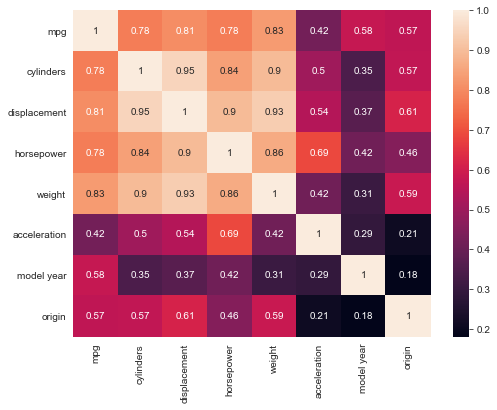

In [59]:
# Create a correlation heatmap as well, with seaborn plus the 'corr' function
# Use .abs to grab the absolute value of the correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr().abs(), annot=True)
plt.show()

### Task 11: Explore your variables

Look at both at the pairplot and the correlation heatmap - what are some trends you see? Any potential problems?

Here, we expect you to look at what kinds of data you have. You may also want to discuss how the data is distributed. Analyze both the relationships between independent variables and the relationships between independent variables and your target/dependent variable (miles per gallon).

In [60]:
# call_on_students(1)

**Observations:**

- Some variables are correlated with the target - especially displacement, horsepower and weight. 
- But a lot of multicollinearity between/among X features as well!
- Most of the data is not normally distributed, except acceleration
- A few categorical columns - origin, cylinders, could also count model year

### Task 12: Pick one X variable and model

Pick the variable you think would be best to use to predict MPG, and create, fit and summarize the output of a statsmodels OLS model!

Set the summary output equal to `simple_model_summary`

In [61]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [62]:
# call_on_students(1)

In [63]:
# Either define X and y (if using OLS) or define your formula (if using ols)
# Make sure that if you use OLS to add a constant to your X!

In [64]:
# V1: 
X = df['weight']
y = df['mpg']

simple_model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()

In [65]:
# V2:
formula = 'mpg ~ weight'

simple_model = ols(formula=formula, data=df).fit()

In [66]:
simple_model_summary = simple_model.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Fri, 09 Sep 2022   Prob (F-statistic):          6.02e-102
Time:                        09:45:19   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Task 13: Interpret!

In [67]:
# call_on_students(1)

There are many things you could observe from this output, but I want especially for you to make an inference about the relationship between the X variable and MPG.

- R2 = .693 - explains 69.3% of the variance in our y
- weight seems to be a significant variable (p value is so small it renders as 0)
- one additional weight unit drives down the expected mpg by -.0076


### Task 14: Model with all numeric X variables

Create, fit and summarize the output of a statsmodels OLS model that has all of the possible X variables in our dataset!

Set the summary output equal to `model_summary`

In [68]:
# Want to use 'cylinders', 'displacement', 'horsepower', 'weight' and 'acceleration'
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [69]:
# call_on_students(1)

In [70]:
# Either define X and y (if using OLS) or define your formula (if using ols)
# Make sure that if you use OLS to add a constant to your X! 

In [71]:
# V1: 
X = df.drop(columns=['mpg', 'model year', 'origin', 'car name'])
y = df['mpg']

X.head()

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130,3504,12.0
1,8,350.0,165,3693,11.5
2,8,318.0,150,3436,11.0
3,8,304.0,150,3433,12.0
4,8,302.0,140,3449,10.5


In [72]:
model = sm.OLS(endog=y, exog=sm.add_constant(X))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     186.9
Date:                Fri, 09 Sep 2022   Prob (F-statistic):          9.82e-101
Time:                        09:45:19   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2252.
Df Residuals:                     386   BIC:                             2276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.2643      2.669     17.331      0.000      41.016      51.513
cylinders       -0.3979      0.411     -0.969      0.333      -1.205       0.409
displacement -8.313e-05      0.009     -0.009      0.993      -0.018       0.018
horsepower      -0.0453      0.017     -2.716      0.007      -0.078      -0.012
weight          -0.0052      0.001     -6.351      0.000      -0.007      -0.004
acceleration    -0.0291      0.126     -0.231      0.817      -0.276       0.218
==============================================================================
Omnibus:                       38.561   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.737
Skew:                           0.706   Prob(JB):                     3.53e-12
Kurtosis:                       4.111   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
model.fit()

In [74]:
# V2:
X_cols = list(X.columns)
print(X_cols)

formula = "mpg ~ " + " + ".join(X_cols)

model1 = ols(formula=formula, data=df).fit()

['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']


In [75]:
model_summary = model1.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     186.9
Date:                Fri, 09 Sep 2022   Prob (F-statistic):          9.82e-101
Time:                        09:45:19   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2252.
Df Residuals:                     386   BIC:                             2276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       46.2643      2.669     17.331      0.000      41.016      51.513
cylinders       -0.3979      0.411     -0.969      0.333      -1.205       0.409
displacement -8.313e-05      0.009     -0.009      0.993      -0.018       0.018
horsepower      -0.0453      0.017     -2.716      0.007      -0.078      -0.012
weight          -0.0052      0.001     -6.351      0.000      -0.007      -0.004
acceleration    -0.0291      0.126     -0.231      0.817      -0.276       0.218
==============================================================================
Omnibus:                       38.561   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.737
Skew:                           0.706   Prob(JB):                     3.53e-12
Kurtosis:                       4.111   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Task 15: Interpret!


In [76]:
# call_on_students(1)

Specifically, compare this model summary to your simple model's summary.

- 
